In [24]:
# Sheet 04 Kernel PCA
# Group: nonames2

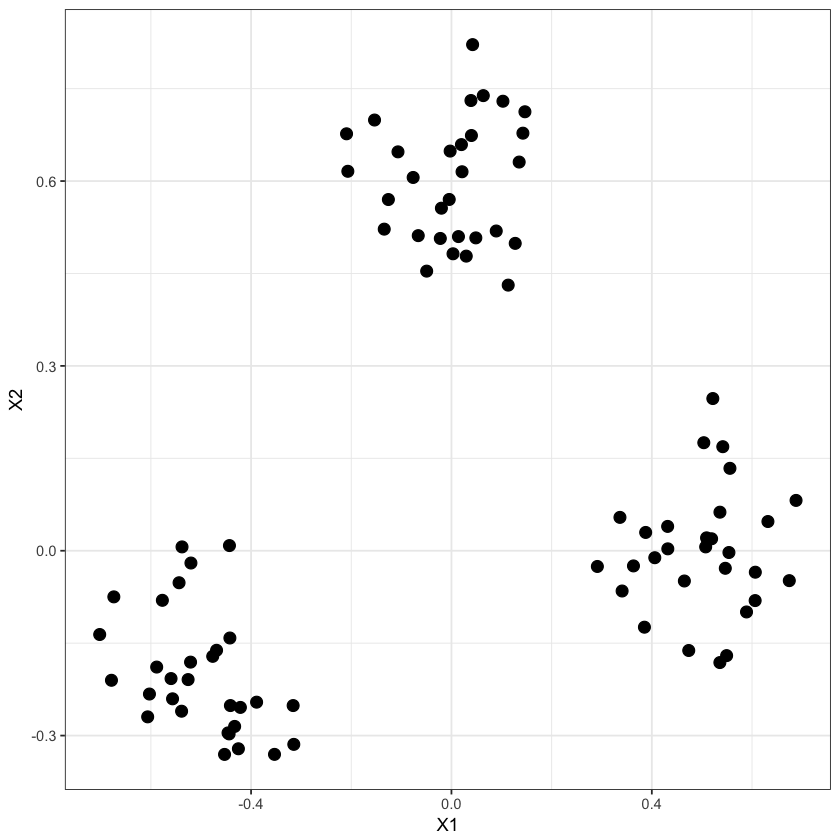

In [25]:
library(ggplot2)

### 4.1)

# a)

rnorm2 <- function(n,mean,sd){
    mean+sd*scale(rnorm(n))
}

set.seed(12345)
X <- data.frame(X1 = c(rnorm2(30, -.5, .1), 
                       rnorm2(30, 0, .1), rnorm2(30, .5, .1)),
                X2 = c(rnorm2(30, -.2, .1), 
                        rnorm2(30, .6, .1), rnorm2(30, 0, .1)))


# check the result
ggplot(X, aes(x = X1, y = X2)) + 
    geom_point(size = 3) + 
    theme_bw() 


In [26]:
# b)

sqnorm <- function (x1, x2) {
    temp <- x1 - x2
    sum(temp * temp)
} 

rbf <- function(x1, x2, sigma){
    return(exp(-(sqnorm(x1,x2)/2*sigma^2)))
}


# generate empty kernel matrix
K <- matrix(nrow = nrow(X), ncol = nrow(X))


for(i in 1:nrow(X)){
    for(j in 1:nrow(X)){
        K[i, j] <- rbf(X[i,], X[j, ], sigma = 6.5)
    }
}


# centering
N <- matrix(1/nrow(K), nrow = nrow(K), ncol = ncol(K))

K_cen <- K - N%*%K - K%*%N + N%*%K%*%N


# 1/p*K*a_k  = λ_k*a_k
# --> multiply K_cen by 1/p and extract normalized eigenvectors

p = nrow(K_cen)

# compute eigenvalues and normalized eigenvectors of centered kernel matrix
eigenvecs <- eigen(K_cen)$vectors
eigenvals <- eigen(K_cen)$values

# The coefficients are stored in the object eigenvecs


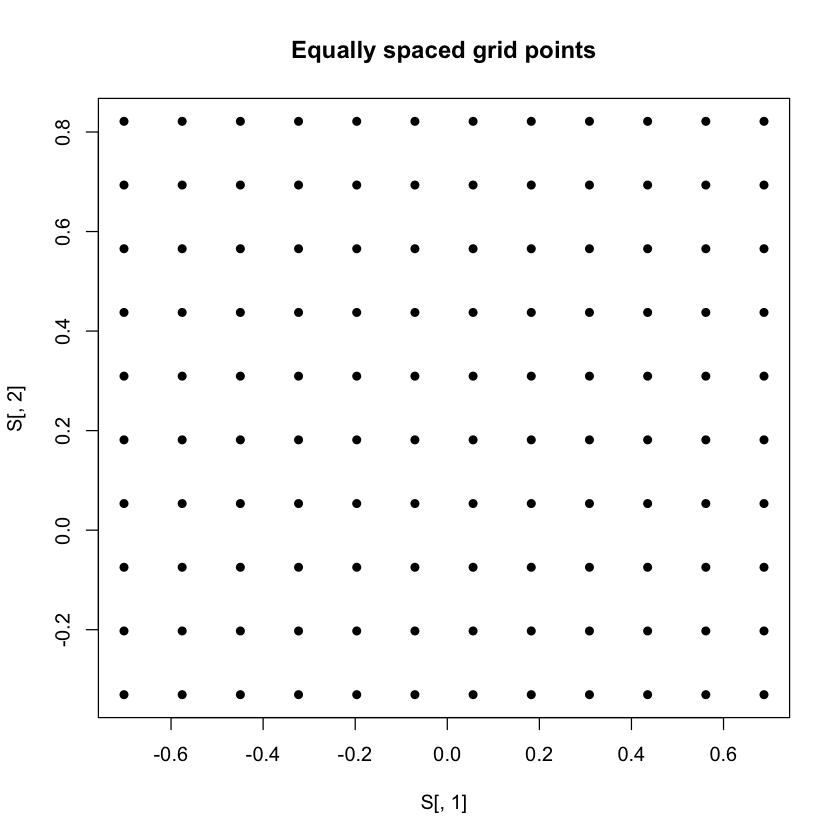

In [27]:
# c)

min1 <- min(X$X1)
min2 <- min(X$X2)

max1 <- max(X$X1)
max2 <- max(X$X2)

s1 = seq(min1, max1, length.out = 12)
s2 = seq(min2, max2, length.out = 10)

# create equally spaced test gridpoints
S = data.frame(S1 = rep(s1, each = 10), S2 = rep(s2, times = 12))
plot(S[,1], S[,2], main = "Equally spaced grid points", pch = 16)

# center the new feature vectors
S <- scale(S, center = TRUE)

pcs <- eigenvecs[, 1:8]
lambdas <- eigenvals[1:8]

# setup new matrix for kernels between new datapoints and the original ones
K_new <- matrix(nrow = nrow(X), ncol = nrow(S))

for(i in 1:nrow(X)){
    for(j in 1:nrow(S)){
        K_new[i, j] <- rbf(X[i,], S[j, ], sigma = 6.5)
    }
}


# project new test data points onto the first 8 pcs
S_proj <- t(K_new)%*%pcs%*%diag(sqrt(lambdas))

d)

Generally, Kernel PCA is especially useful for nonlinear classification problems and dimensionality reduction. Since regular PCA is a linear method, it often fails to detect nonlinear patterns in the data. The problem is that regular PCA only works well, when the data is linearly separable. However, when the data is not linearly separable, a nonlinear technique such as Kernel PCA is required. The ‘trick’ is that often the data is linearly separable in a much higher dimensional space. Kernel PCA makes use of that, by transforming the original data to a much higher dimensional space. 
Possible applications are de-noising in image analysis (for example hand-written digit classification), pattern recognition or novelty detection.
However, it needs to be considered that Kernel PCA can be computationally very costly, when the number of observations (i.e. data points) is very high. As a result, a very large Kernel matrix has to be computed. Therefore, any application of Kernel PCA in situations where a very large number of data points has to be processed may be problematic.
